## <center>Analyzing report - Customers of the airlines</center>

### <center> Author: Tamila Avramchuk </center>

Data: dataset `Test-data.csv`

Goal: to analyze revenues from the selling tickets for the flights on the day of 29-09-2025.

Importing all essential libraries for the analysis

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating a dataframe using `Test-data.csv`. Displaying the first 5 rows of the dataframe.

In [153]:
df = pd.read_csv("Test-data.csv")
df.head()

,Customer_ID,Age,Gender,Nationality,Loyalty_Status,Booking_Channel,Flight_ID,Route,Departure_Date,Scheduled_Time,Delay_Minutes,Cancellation,Ticket_Class,Base_Ticket_Price_USD,Seat_Selection,Seat_Extra_Charge_USD,Pre_Ordered_Meal,Meal_Revenue_USD,Total_Revenue_USD
0,100000,46,Male,Other,Standard,Online,TG345-0,BKK-SIN,2025-09-29,Morning,6,0,Premium Economy,493.62,Aisle,0.0,Yes,5.73,499.36
1,100001,36,Male,China,Standard,Online,TG774-1,BKK-SIN,2025-09-29,Evening,7,0,Business,741.88,Window,0.0,Yes,7.39,749.27
2,100002,41,Female,Other,Standard,Agent,TG954-2,BKK-SIN,2025-09-29,Evening,11,0,Economy,71.65,Exit Row,0.0,No,0.00,71.65
3,100003,47,Male,Japan,Silver,Online,TG213-3,CNX-DMK,2025-09-29,Noon,18,0,Economy,89.29,Extra Legroom,0.0,No,0.00,89.29
4,100004,39,Male,Thai,Standard,Online,TG893-4,BKK-LHR,2025-09-29,Evening,19,0,Economy,69.70,Aisle,0.0,No,0.00,69.70


To understand the data better, I used the `.info()` to get acquainted with the data, its types and possible missings. 

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Nationality            5000 non-null   object 
 4   Loyalty_Status         5000 non-null   object 
 5   Booking_Channel        5000 non-null   object 
 6   Flight_ID              5000 non-null   object 
 7   Route                  5000 non-null   object 
 8   Departure_Date         5000 non-null   object 
 9   Scheduled_Time         5000 non-null   object 
 10  Delay_Minutes          5000 non-null   int64  
 11  Cancellation           5000 non-null   int64  
 12  Ticket_Class           5000 non-null   object 
 13  Base_Ticket_Price_USD  5000 non-null   float64
 14  Seat_Selection         5000 non-null   object 
 15  Seat

To get to know statistics for numerical type of the data, I used `.describe()`

In [155]:
df.describe()

,Customer_ID,Age,Delay_Minutes,Cancellation,Base_Ticket_Price_USD,Seat_Extra_Charge_USD,Meal_Revenue_USD,Total_Revenue_USD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,102499.500000,45.772800,14.694000,0.020200,379.624904,4.708272,2.383870,386.716736
std,1443.520003,16.445914,4.398071,0.140698,609.655039,7.446278,3.765582,608.235283
min,100000.000000,18.000000,0.000000,0.000000,40.400000,0.000000,0.000000,40.400000
25%,101249.750000,32.000000,12.000000,0.000000,108.115000,0.000000,0.000000,115.770000
50%,102499.500000,46.000000,15.000000,0.000000,174.395000,0.000000,0.000000,183.200000
75%,103749.250000,60.000000,17.000000,0.000000,350.727500,8.570000,5.560000,359.582500
max,104999.000000,74.000000,34.000000,1.000000,4220.280000,28.570000,11.430000,4229.910000


Checking the possible missing values

In [156]:
df.isna().sum()

Customer_ID              0
Age                      0
Gender                   0
Nationality              0
Loyalty_Status           0
Booking_Channel          0
Flight_ID                0
Route                    0
Departure_Date           0
Scheduled_Time           0
Delay_Minutes            0
Cancellation             0
Ticket_Class             0
Base_Ticket_Price_USD    0
Seat_Selection           0
Seat_Extra_Charge_USD    0
Pre_Ordered_Meal         0
Meal_Revenue_USD         0
Total_Revenue_USD        0
dtype: int64

Data cleaning.
---
Changing the type of the column `Departure_Date` into the date format. 

In [157]:
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])

Dropping all of the possible duplicates. 

In [158]:
df = df.drop_duplicates()

Splitting column `Route` into `Origin Airport` and `Destination Airport`

In [159]:
df[['Origin Airport', 'Destination Airport']] = df['Route'].str.split("-", expand=True)

Creating extra column `Extra_Revenue`, which consists of the revenue from the seat choise and meal revenue

In [160]:
df['Extra_Revenue'] = (df['Seat_Extra_Charge_USD'] + df['Meal_Revenue_USD'])

Creating extra column `Delay_Category`, which tells us the category of the delay. In EU if delay is more than 180 minutes (3 hours), the airline company must pay the compensations, which leads to company losses. 

In [161]:
df['Delay_Category'] = pd.cut(
    df['Delay_Minutes'],
    bins=[0, 60, 180, 9999],
    labels=['Short','Long','Extreme'],
    include_lowest=True
)

Analysis 
---
Checking the range of the time we have in the dataset. It occurs that we have only flights to analyze on the day of 29-09-2025

In [162]:
df["Departure_Date"].unique()

array(['2025-09-29T00:00:00.000000000'], dtype='datetime64[ns]')

Counting the number of the unique flight on this day

In [163]:
df['Flight_ID'].nunique()


3842

Counting the total revenues from all tickets selled on this day

In [164]:
df['Total_Revenue_USD'].sum()

1933583.6800000002

Calculating the total revenues by the part of day

In [165]:
df.groupby('Scheduled_Time')['Total_Revenue_USD'].sum().sort_values(ascending=False)

Scheduled_Time
Evening    605530.34
Noon       542584.72
Night      408066.81
Morning    377401.81
Name: Total_Revenue_USD, dtype: float64

Let's check, how many routes we had on this day. We could see it's only 5 types of the routes.

In [166]:
df['Route'].unique()

array(['BKK-SIN', 'CNX-DMK', 'BKK-LHR', 'BKK-NRT', 'HKT-BKK'],
      dtype=object)

Let's find out what route brings us the most profit on this day.

In [167]:
df.groupby('Route')['Total_Revenue_USD'].sum().sort_values(ascending=False)

Route
HKT-BKK    419060.90
BKK-LHR    396690.65
BKK-NRT    392018.84
BKK-SIN    363547.32
CNX-DMK    362265.97
Name: Total_Revenue_USD, dtype: float64

Let's do the same with `Loalty_Status` and `Booking_Channel`

In [168]:
df['Loyalty_Status'].unique()

array(['Standard', 'Silver', 'Platinum', 'Gold'], dtype=object)

In [169]:
df.groupby('Loyalty_Status')['Total_Revenue_USD'].sum().sort_values(ascending=False)

Loyalty_Status
Standard    1337811.88
Silver       398116.45
Gold         145429.58
Platinum      52225.77
Name: Total_Revenue_USD, dtype: float64

In [170]:
df['Booking_Channel'].unique()

array(['Online', 'Agent', 'Direct'], dtype=object)

In [171]:
df.groupby('Booking_Channel')['Total_Revenue_USD'].sum().sort_values(ascending=False)

Booking_Channel
Agent     655105.60
Online    646501.69
Direct    631976.39
Name: Total_Revenue_USD, dtype: float64

All of these statistics I have used to create a dashboard. 

## Extra Analysis

Top 3 origin airports on this day

In [172]:
df['Origin Airport'].value_counts()

BKK    2977
HKT    1037
CNX     986
Name: Origin Airport, dtype: int64

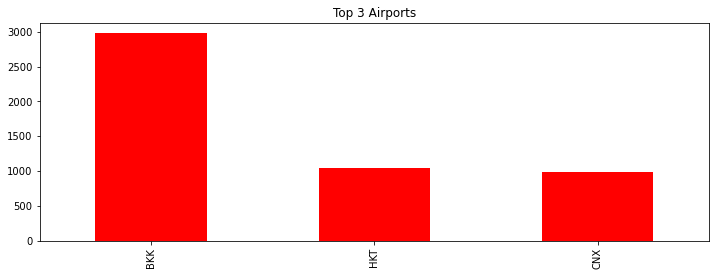

In [173]:
plt.figure(figsize=(12,4))
df['Origin Airport'].value_counts().head().plot(kind='bar',color="red")
plt.title("Top 3 Airports")
plt.show()

Let's find out what type of customers (according to loyalty status) bought the most tickets

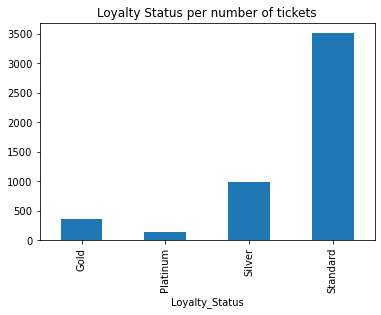

In [174]:
plt.figure(figsize=(6,4))
df.groupby("Loyalty_Status")["Flight_ID"].count().plot(kind='bar')
plt.title("Loyalty Status per number of tickets")
plt.show()

Let's check the number of customers who didn't buy any meal during the flight

In [175]:
(df['Meal_Revenue_USD'] == 0).sum()

3470

Almost 70% of customers didn't buy any food during the flight on that day

In [176]:
(df['Meal_Revenue_USD'] == 0).sum()/df['Customer_ID'].count()*100

69.39999999999999

Let's check if there is any correlation between meal revenue and ticket revenue. Spoiler: there is no obvious correlation. 

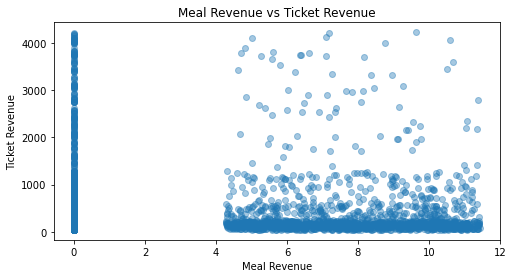

In [177]:
plt.figure(figsize=(8,4))
plt.scatter(df['Meal_Revenue_USD'], df['Base_Ticket_Price_USD'], alpha=0.4)
plt.title("Meal Revenue vs Ticket Revenue")
plt.xlabel("Meal Revenue")
plt.ylabel("Ticket Revenue")
plt.show()

## Summary. 

I have analyzed the dataset of the customers of airline company who bought tickets on the day of 29-09-2025. The total revenue was around 2 millions dollars. The number of flights on that days was 3842. We had the flights from 3 airports to 5 different destinations (or just 5 types of routes). Each of the route brings us the revenue between 360k-420k, which is quite impressive. Returning to the clients, the clients with loalty status Standard bring us the most revenue in contrast to other type of loyalty status. The clients, who booked the tickets by the Agent, also bring us the most profit. Regarding the schedule time on 29-09-2025 customers prefer evening and afternoon flights, which we could see by the total revenues during these times of the day. Besides, I checked the revenue of the meals during the flights on that day, it occured that almost 70% of customers haven't bought any food during the flight, which should be considered during budget meeting concerning the meals during the flights.   